# Quiz 5 Problem 4: Classifying Handwritten Digits

Using the MNIST dataset, we want to build a simple threshold-based classifier that classifies 1’s from 0’s. To do that we start, we the following steps.

1. We created a new training, validation, and test set of only the 1 and 0 digits. We randomly selected 100 images of the training set as the validation set and the remaining ones as the training set.

2. Converted each image to one attribute by calculating the average of all the pixel values of a 3x3 grid placed on the center of the image. NOTE: We placed the grid center on pixel 14.

3. We plotted the attribute values of the validation set. We used different colors and shapes for 0's and 1's. The x-axis in this figure is the image number, and the y-axis is the calculated attribute. Label the axes and add legends appropriately. 

### Import Libraries

In [ ]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from random import randint

### Function Definitions

In [2]:
def img_plt(images, labels):
    plt.figure() #figsize=(15,8)
    for i in range(1, 11):
        plt.subplot(2, 5, i)
        plt.imshow(images[i - 1,:,:], cmap = 'gray')
        plt.title('Label: ' + str(labels[i - 1]))
    plt.show()

def feat_plt(feature, labels, digits):
    plt.figure()
    sample_nums = np.arange(feature.shape[0])
    plt.plot(sample_nums[labels == digits[0]],feature[labels == digits[0]],'gs', 
            sample_nums[labels == digits[1]],feature[labels == digits[1]],'r^')
    plt.xlabel('Sample #')
    plt.ylabel('Average of the 3x3 center grid')
    plt.title('Extrated feature from validation data')
    plt.show()

def pred_fun (features, threshold, digits):
    y_pred = np.ones(features.shape)*digits[0]
    y_pred[features>threshold] = digits[1]
    return y_pred

def acc_fun(labels_actual, labels_pred):
    acc = np.sum(labels_actual == labels_pred) / len(labels_actual) * 100
    return acc

### Load MNIST Data

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Select Digits 0 & 1 from Complete Training Set

In [4]:
select_digits = [0, 1] #blank1, blank2

x_train_dg = x_train[np.logical_or(y_train == select_digits[0], y_train == select_digits[1])]
y_train_dg = y_train[np.logical_or(y_train == select_digits[0], y_train == select_digits[1])]

x_test_dg = x_test[np.logical_or(y_test == select_digits[0],y_test == select_digits[1]), 0: 28]
y_test_dg = y_test[np.logical_or(y_test == select_digits[0],y_test == select_digits[1])]

### Print Sample Training and Testing Images

Samples of Training Images


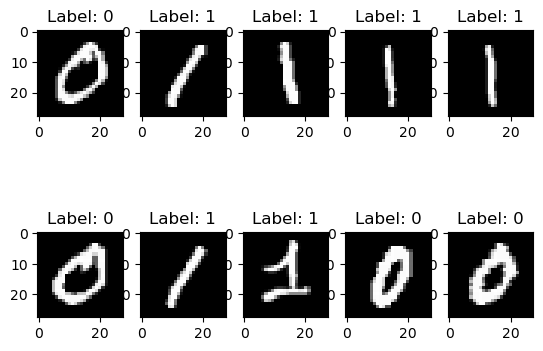

Samples of Testing Images


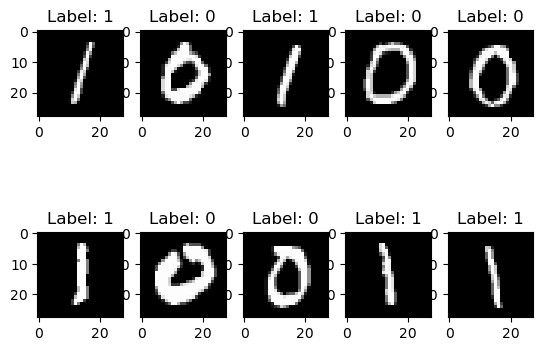

In [5]:
print('Samples of Training Images')
img_plt(x_train_dg[0:10,:,:],y_train_dg[0:10])

print('Samples of Testing Images')
img_plt(x_test_dg[0:10,:,:],y_test_dg[0:10])

### Randomize Training Data Set

In [6]:
num_train_img = x_train_dg.shape[0]
print(f'Number of Training Images: {num_train_img}\n')

# randomize
train_ind = np.arange(0,num_train_img)
train_ind_s = np.random.permutation(train_ind)

x_train_dg = x_train_dg[train_ind_s,:,:]
y_train_dg = y_train_dg[train_ind_s]

print(f'Shape of x_train_dg: {x_train_dg.shape}')
print(f'Shape of y_train_dg: {y_train_dg.shape}')

Number of Training Images: 12665

Shape of x_train_dg: (12665, 28, 28)
Shape of y_train_dg: (12665,)


### Separate Training and Validation Sets

Shape of x_val_dg: (100, 28, 28)
Shape of y_val_dg: (100,)

Shape of x_traib_dg: (12565, 28, 28)
Shape of y_train_dg: (12565,)

Samples of the Validation Images


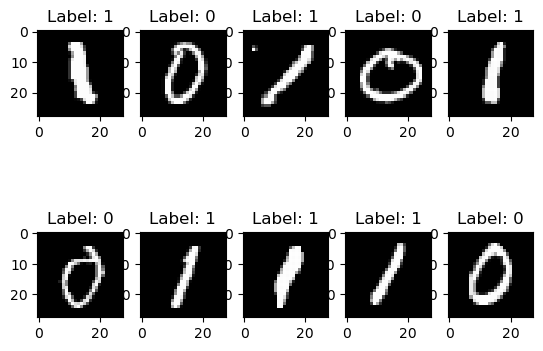

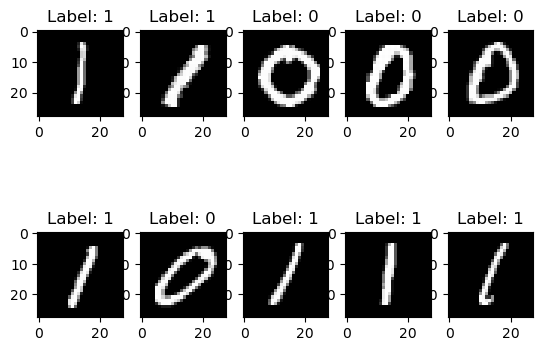

In [7]:
#Selecting the validation set
x_val_dg = x_train_dg[0:100,:,:] #blank3
y_val_dg = y_train_dg[0:100] # blank4
print(f'Shape of x_val_dg: {x_val_dg.shape}')
print(f'Shape of y_val_dg: {y_val_dg.shape}\n')

#The rest of the training set
x_train_dg = x_train_dg[100:,:,:] # blank5
y_train_dg = y_train_dg[100:] # blank6
print(f'Shape of x_traib_dg: {x_train_dg.shape}')
print(f'Shape of y_train_dg: {y_train_dg.shape}\n')

print('Samples of the Validation Images')
img_plt(x_val_dg[0:10,:,:], y_val_dg[0:10])
img_plt(x_train_dg[0:10,:,:], y_train_dg[0:10])

### Compute Attribute Value of Center 3 by 3 Grid

In [8]:
feature_train = np.sum(x_train_dg[:, 12:15, 12:15], axis = 2)
feature_train = np.sum(feature_train, axis = 1) / 9

feature_val = np.sum(x_val_dg[:, 12:15, 12:15], axis = 2)
feature_val = np.sum(feature_val, axis = 1 ) / 9

feature_test = np.sum(x_test_dg[:, 12:15, 12:15], axis = 2) 
feature_test = np.sum(feature_test, axis = 1) / 9

### Plot Data Predictions

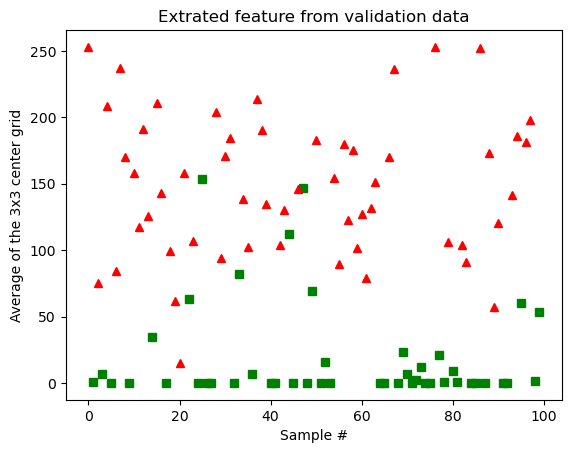

In [9]:
feat_plt(feature_val, y_val_dg, select_digits)